In [51]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [52]:
df = pd.read_csv('data/BenchmarkingSample20230607.csv')
df

Unit  Period  Days                  Account  Amount
0     00040302CD88       1    30                    Sales   89952
1     00040302CD88       2    31                    Sales   90594
2     00040302CD88       3    30                    Sales   81909
3     00040302CD88       4    31                    Sales   87418
4     00040302CD88       5    31                    Sales   91109
...            ...     ...   ...                      ...     ...
6043  0004030BEB57      20    30  Other Non-controllables    1455
6044  0004030BEB57      21    31  Other Non-controllables    7456
6045  0004030BEB57      22    31  Other Non-controllables    2037
6046  0004030BEB57      23    28  Other Non-controllables    2037
6047  0004030BEB57      24    31  Other Non-controllables    2037

[6048 rows x 5 columns]

In [53]:
# Make a new df with just negative values
dfn = df[df['Amount'] < 0].copy()
dfn

Unit  Period  Days                    Account  Amount
745   00040302D006       2    31                 Crew Labor     -46
746   00040302D006       3    30                 Crew Labor   -1394
1396  00040302D006       5    31  Other Labor-related Costs    -513
2168  00040302CD88       9    31                  Promotion    -303
2172  00040302CD88      13    30                  Promotion    -114
...            ...     ...   ...                        ...     ...
5964  00040302D014      13    30    Other Non-controllables   -2116
5988  0004030A635E      13    30    Other Non-controllables   -5470
6012  0004030B92EE      13    30    Other Non-controllables   -3232
6022  0004030B92EE      23    28    Other Non-controllables    -725
6036  0004030BEB57      13    30    Other Non-controllables   -3775

[133 rows x 5 columns]

## Data Understanding

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Unit     6048 non-null   object
 1   Period   6048 non-null   int64 
 2   Days     6048 non-null   int64 
 3   Account  6048 non-null   object
 4   Amount   6048 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 236.4+ KB


In [55]:
# reshape df
unmelt = df.pivot_table(index=['Unit', 'Period', 'Days'], columns='Account', values='Amount', aggfunc='sum')
unmelt = unmelt.reset_index()
unmelt

Account          Unit  Period  Days  Advertising  Cost of Sales - Food  \
0        00040302CD88       1    30         3778                 20557   
1        00040302CD88       2    31         3805                 20876   
2        00040302CD88       3    30         3440                 19531   
3        00040302CD88       4    31         3672                 20999   
4        00040302CD88       5    31         3827                 21357   
..                ...     ...   ...          ...                   ...   
211      0004030BEB57      20    30        15729                 99236   
212      0004030BEB57      21    31        12227                108507   
213      0004030BEB57      22    31        15255                101713   
214      0004030BEB57      23    28        15020                 98547   
215      0004030BEB57      24    31        17368                110366   

Account  Cost of Sales - Paper  Crew Labor  Maintenance & Repair  \
0                         2190         486                  5135   
1                         2058        1376                  1553   
2                         2291         178                  2321   
3                         2056       36597                  3412   
4                         2312       29942                  3345   
..                         ...         ...                   ...   
211                      10557       75243                  8789   
212                      13137       94509                  1704   
213                      10812       82894                  3256   
214                      11558       83338                  3605   
215                      10063       94112                  5267   

Account  Management Labor  Other Controllables  Other Labor-related Costs  \
0                    3983                 3167                       3429   
1                    4255                 3899                       3699   
2                    4241                 3646                       3614   
3                    5515                 2581                       6944   
4                    5484                 3772                       7109   
..                    ...                  ...                        ...   
211                  3997                 2729                      15678   
212                  4989                 6187                      15246   
213                  4278                 4408                      16168   
214                  5253                 3443                      16454   
215                  5433                 4094                      18421   

Account  Other Non-controllables  Outside Services  Promotion   Rent   Sales  \
0                           7879              8462        401   -610   89952   
1                           7918              5329        445   -178   90594   
2                           7471              5062        553   -527   81909   
3                           7537              5967        874   -353   87418   
4                           6385              5727        635   -167   91109   
..                           ...               ...        ...    ...     ...   
211                        26672             11476         -3  64375  374497   
212                        39347             16172      -1144  81337  424685   
213                        28140             11189       2665  58308  363205   
214                        27999             10646        608  56786  357611   
215                        30603             14421       1761  68428  413521   

Account  Utilities  
0             5690  
1             4917  
2             4692  
3             5699  
4             5109  
..             ...  
211           6230  
212           6480  
213           8236  
214           2656  
215           7001  

[216 rows x 17 columns]

In [56]:
unmelt.value_counts()

Unit          Period  Days  Advertising  Cost of Sales - Food  Cost of Sales - Paper  Crew Labor  Maintenance & Repair  Management Labor  Other Controllables  Other Labor-related Costs  Other Non-controllables  Outside Services  Promotion  Rent    Sales   Utilities
00040302CD88  1       30    3778         20557                 2190                   486         5135                  3983              3167                 3429                       7879                     8462              401        -610    89952   5690         1
0004030A635E  5       31    22389        113432                12331                  113657      5145                  7148              7250                 24822                      33719                    7357              1172        96502  533084  7738         1
00040302D014  18      30    9700         59849                 6351                   48983       3670                  7110              901                  9960                       20113 

In [57]:
unmelt.describe()

Account      Period        Days   Advertising  Cost of Sales - Food  \
count    216.000000  216.000000    216.000000            216.000000   
mean      12.500000   30.416667  10232.944444          59979.949074   
std        6.938266    0.864009   5709.846541          32676.102087   
min        1.000000   28.000000   1860.000000           9850.000000   
25%        6.750000   30.000000   5577.000000          34888.250000   
50%       12.500000   31.000000   9667.500000          56010.500000   
75%       18.250000   31.000000  13685.250000          82223.500000   
max       24.000000   31.000000  23049.000000         147381.000000   

Account  Cost of Sales - Paper     Crew Labor  Maintenance & Repair  \
count               216.000000     216.000000            216.000000   
mean               6657.981481   54913.486111           3831.439815   
std                3482.848365   28617.832353           1800.365807   
min                 779.000000   -1394.000000            828.000000   
25%                4035.000000   36567.000000           2356.750000   
50%                6356.500000   51521.000000           3571.500000   
75%                8935.250000   75440.000000           4893.000000   
max               15690.000000  121605.000000          10831.000000   

Account  Management Labor  Other Controllables  Other Labor-related Costs  \
count          216.000000           216.000000                 216.000000   
mean          5509.726852          3710.106481               11412.055556   
std           2028.192336          1491.865569                5646.204915   
min            309.000000           901.000000                1556.000000   
25%           4094.000000          2640.000000                7425.000000   
50%           5080.500000          3455.500000               10530.000000   
75%           6961.250000          4604.250000               15020.250000   
max          16581.000000          8828.000000               25839.000000   

Account  Other Non-controllables  Outside Services    Promotion  \
count                 216.000000        216.000000   216.000000   
mean                18857.587963       7741.518519   674.166667   
std                  8737.498027       3498.089877   641.844993   
min                  6112.000000       1302.000000 -2087.000000   
25%                 12025.500000       4868.500000   365.000000   
50%                 17615.000000       7702.000000   621.500000   
75%                 24019.750000      10029.750000   965.500000   
max                 41028.000000      19983.000000  3574.000000   

Account           Rent          Sales     Utilities  
count       216.000000     216.000000    216.000000  
mean      31404.675926  247696.004630   6146.652778  
std       31797.739017  137009.910575   2409.998783  
min      -14050.000000   44281.000000   1030.000000  
25%         594.500000  133278.750000   4855.500000  
50%       26641.000000  230945.500000   6269.500000  
75%       56851.000000  337484.500000   7796.000000  
max      111586.000000  573462.000000  14096.000000

## Feature Relationships

Scatterplot, heatmap correlation, pairplot and groupby comparisons

In [58]:
# Scatter plot
# sns.scatterplot(x= ,y= ,data= )
# sns.pairplot()

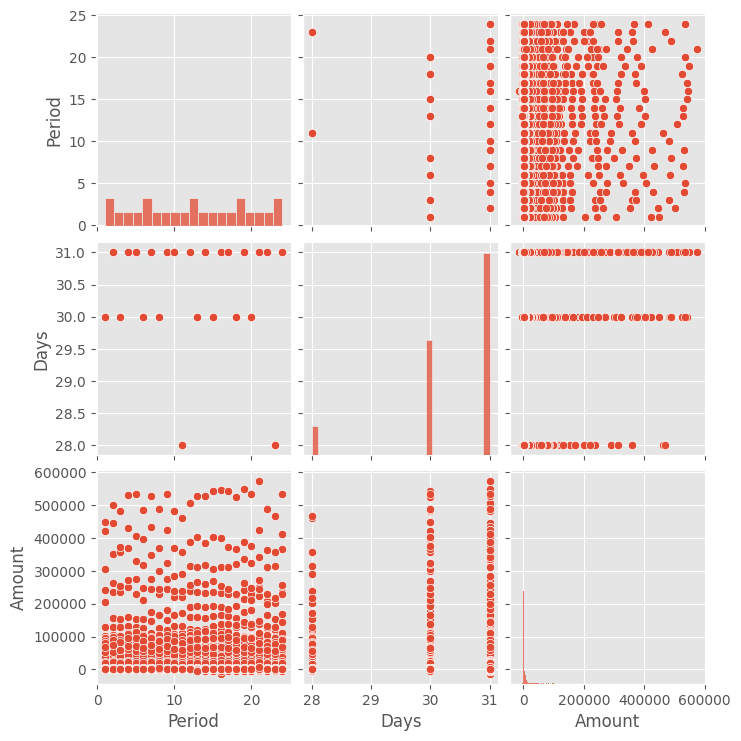

In [59]:
sns.pairplot(df)

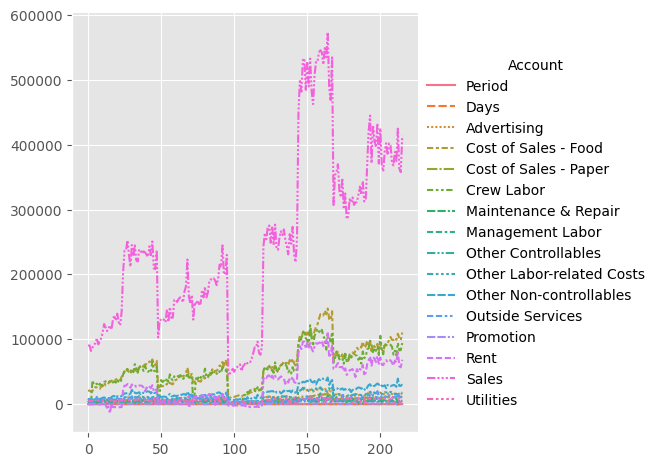

In [60]:
# sns.relplot(x='Period', y='Amount', col='Account', hue='Unit', data=df, col_wrap=4)
sns.relplot(data=unmelt, kind='line')

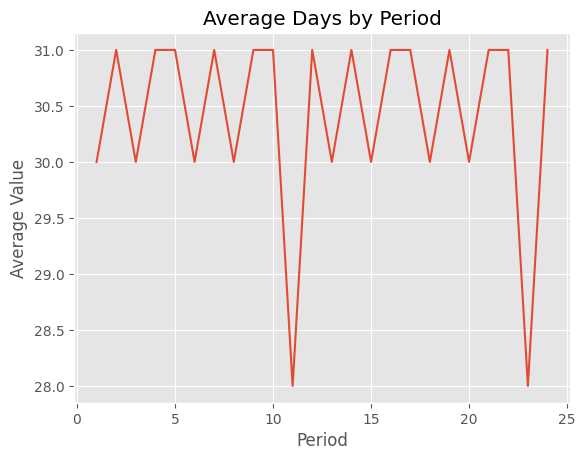

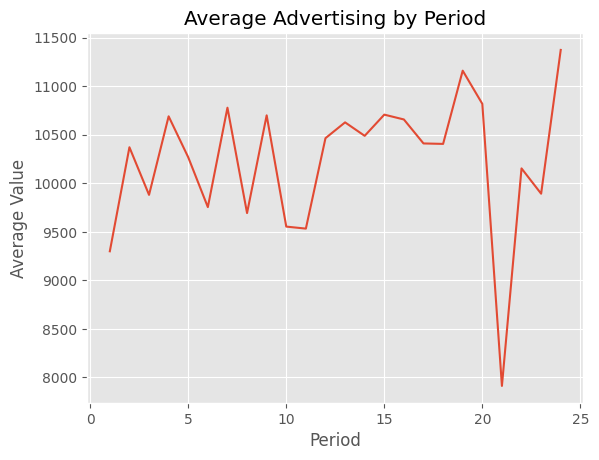

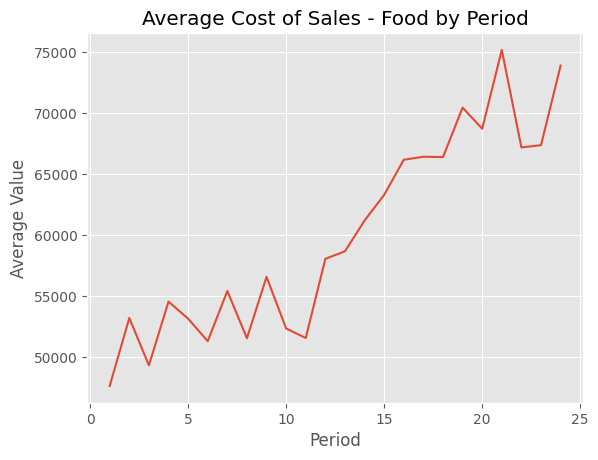

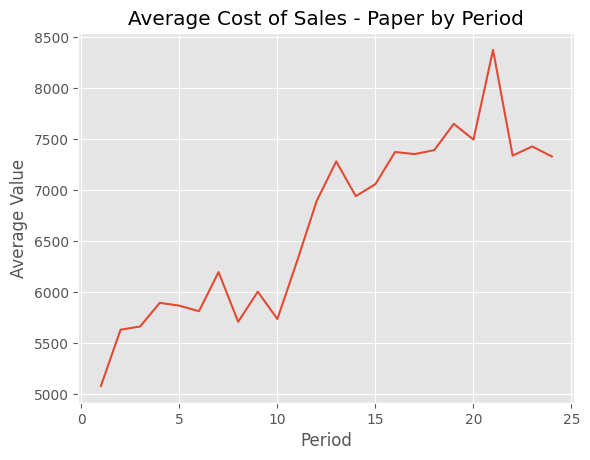

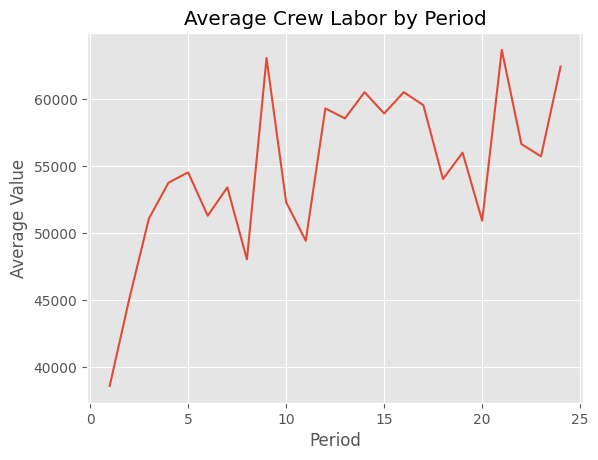

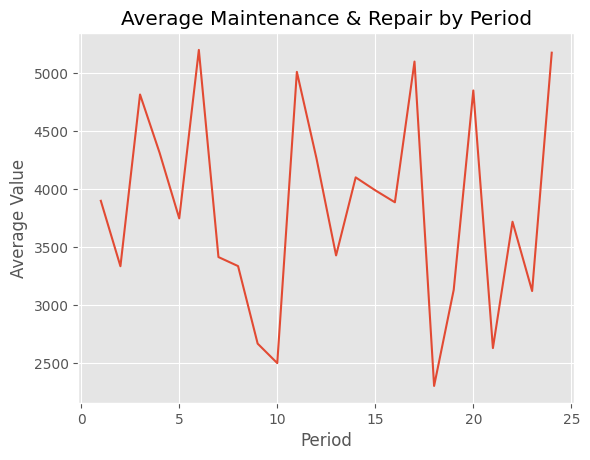

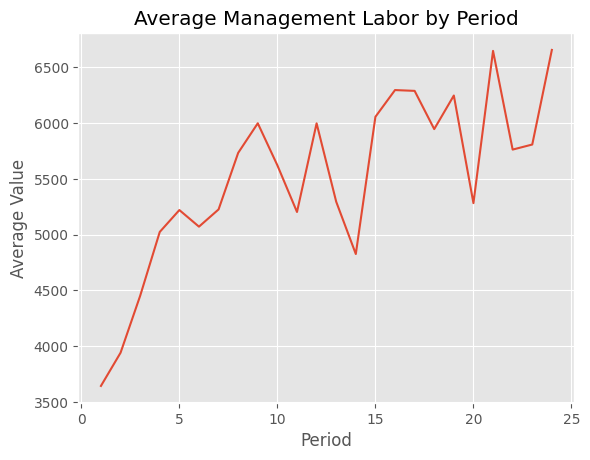

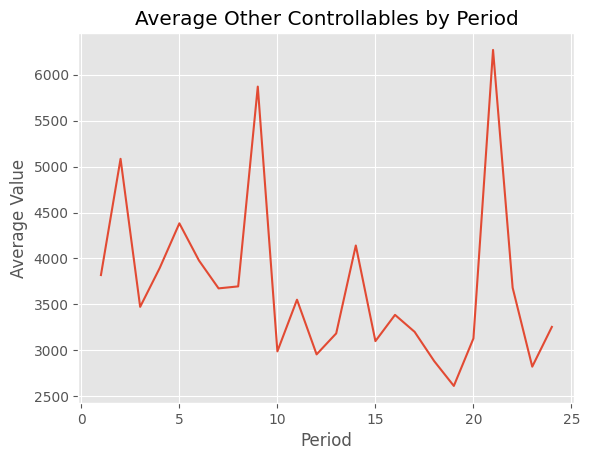

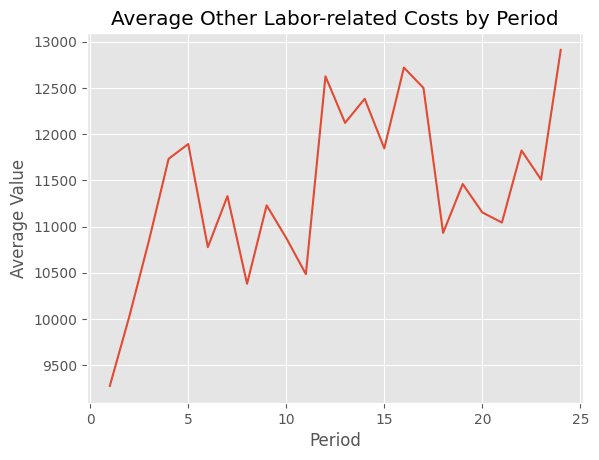

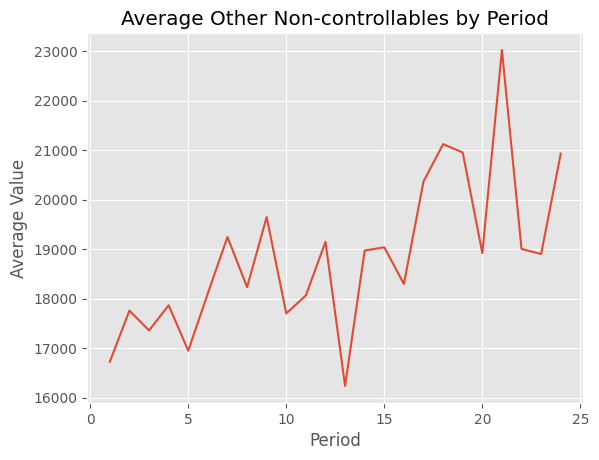

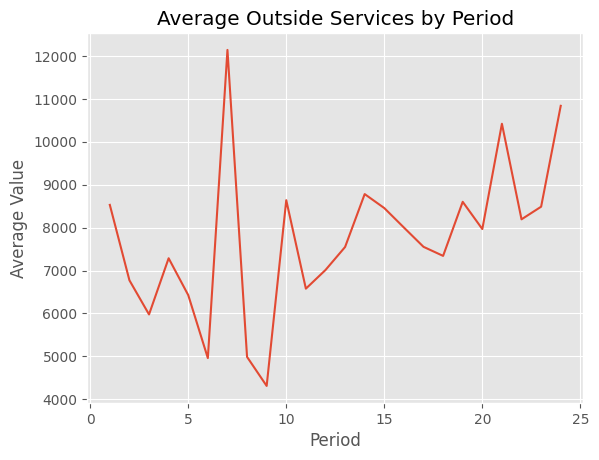

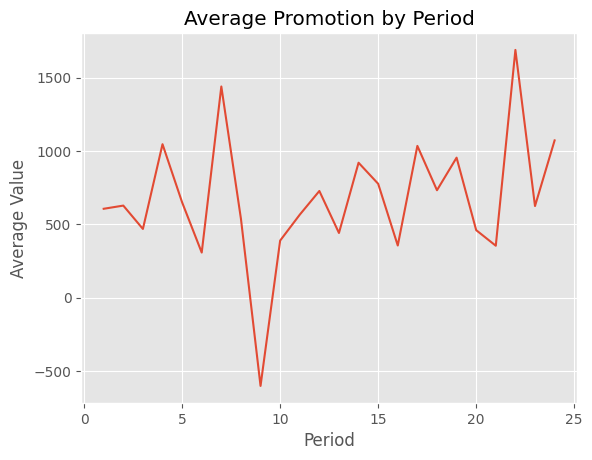

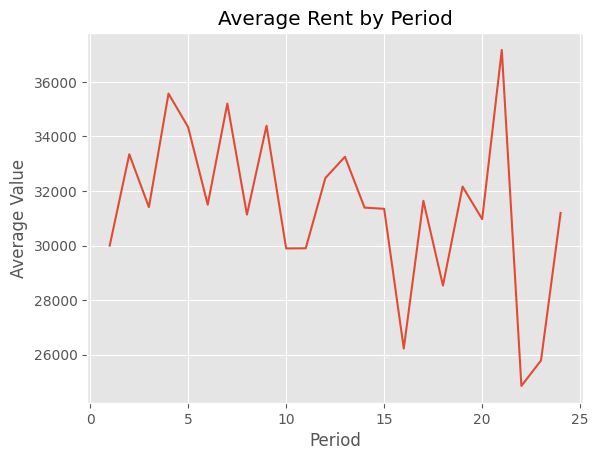

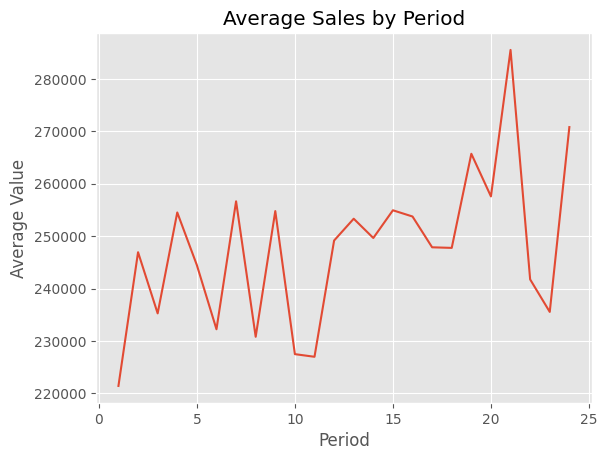

In [61]:
# Make a line chart of the average amount in each account over the dataset
account_columns = unmelt.columns[2:16]
periods = unmelt['Period'].unique()

# Iterate over the account columns
for account in account_columns:
    # Calculate the average value for each period and account
    account_avg = unmelt.groupby('Period')[account].mean()

    # Create the line chart
    plt.plot(account_avg.index, account_avg.values)

    # Set the title and labels
    plt.title(f'Average {account} by Period')
    plt.xlabel('Period')
    plt.ylabel('Average Value')

    # Display the chart
    plt.show()

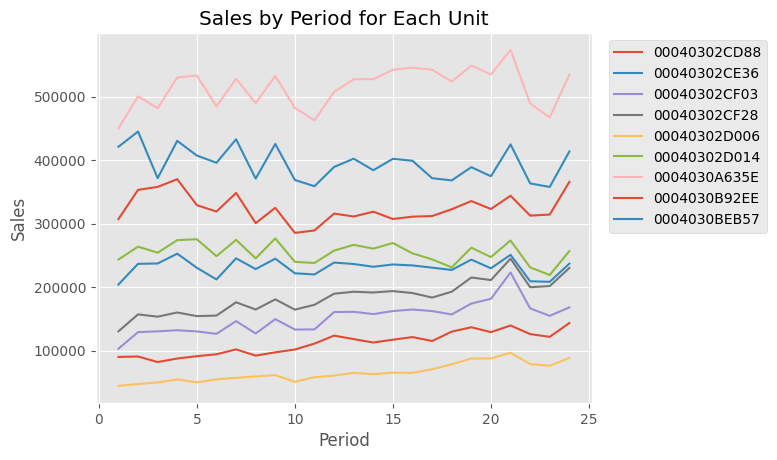

In [62]:
# Make a line chart of the amount in sales over the dataset
sales_data = unmelt.pivot(index='Unit', columns='Period', values='Sales')

# Create the line chart
ax = sales_data.T.plot()

# Set the title and labels
plt.title('Sales by Period for Each Unit')
plt.xlabel('Period')
plt.ylabel('Sales')

# Adjust the legend position
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Display the chart
plt.show()

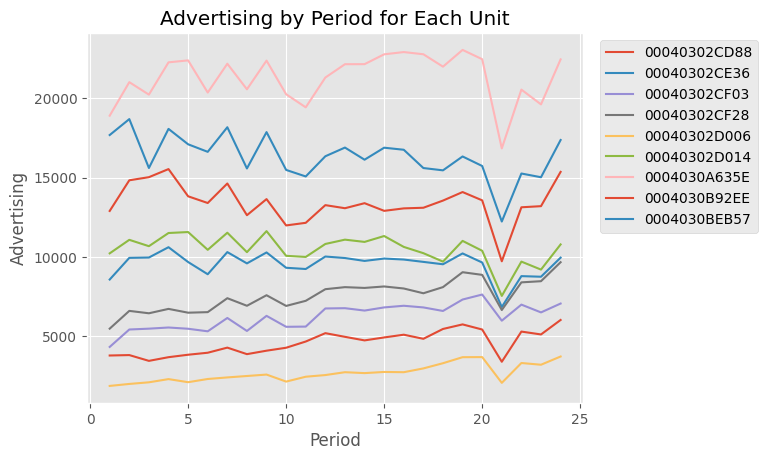

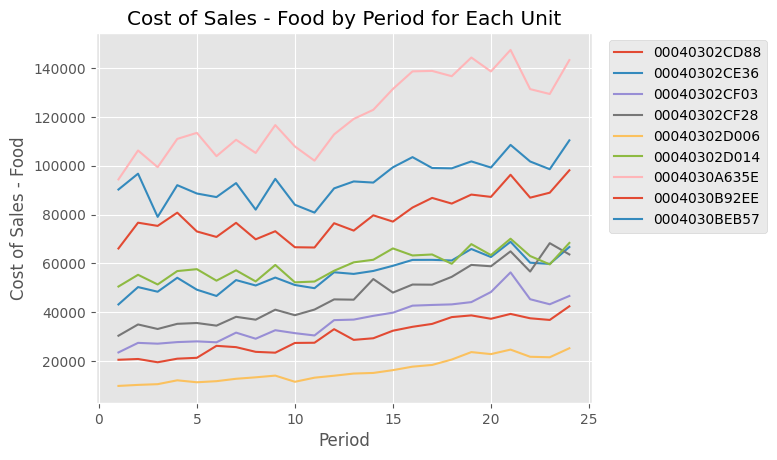

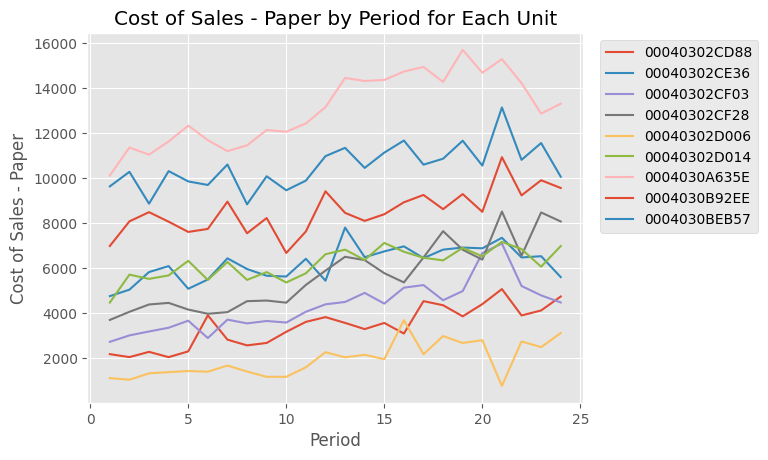

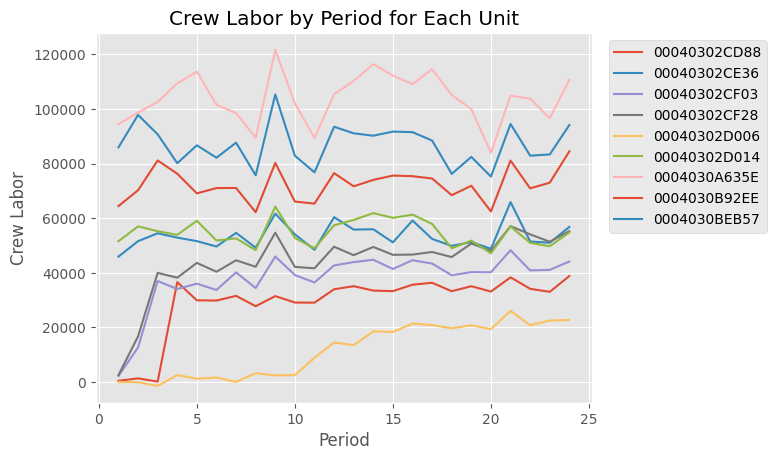

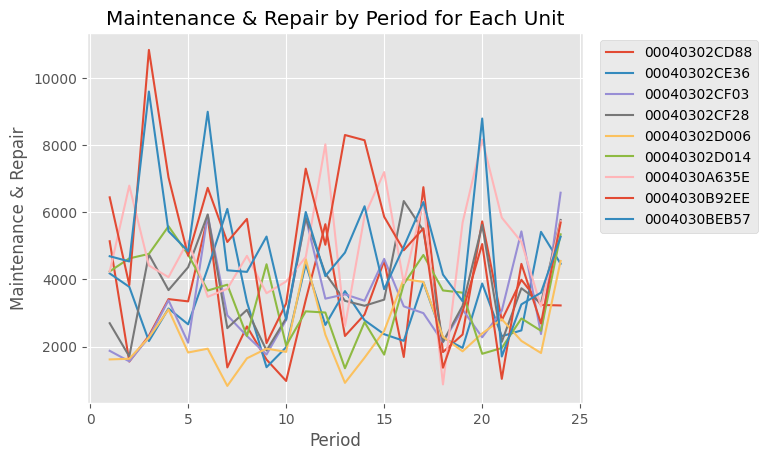

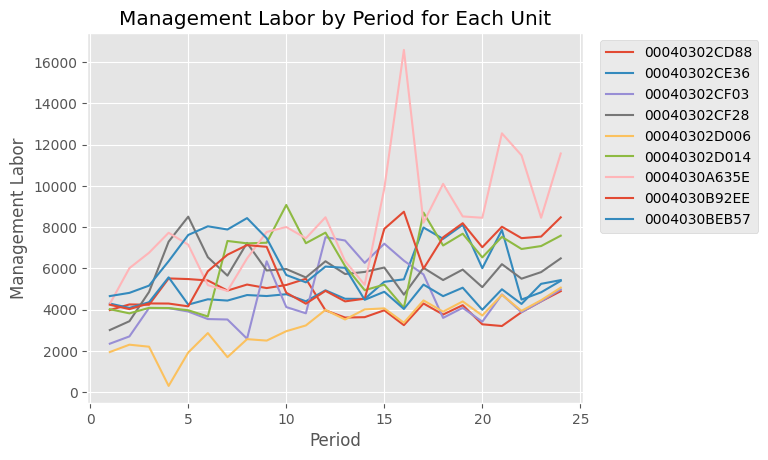

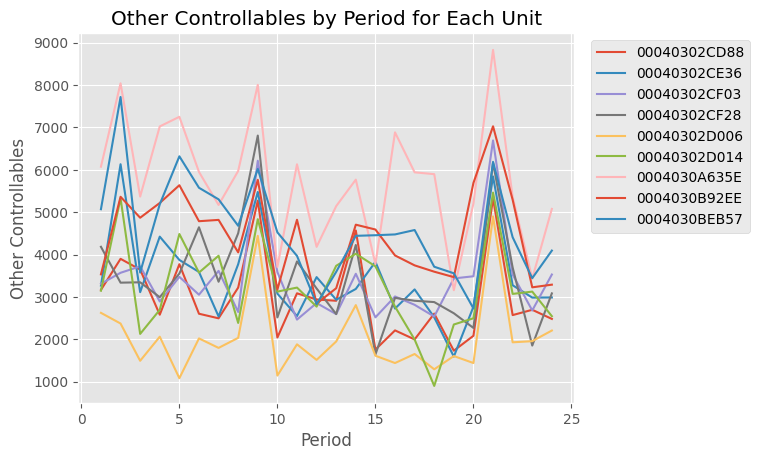

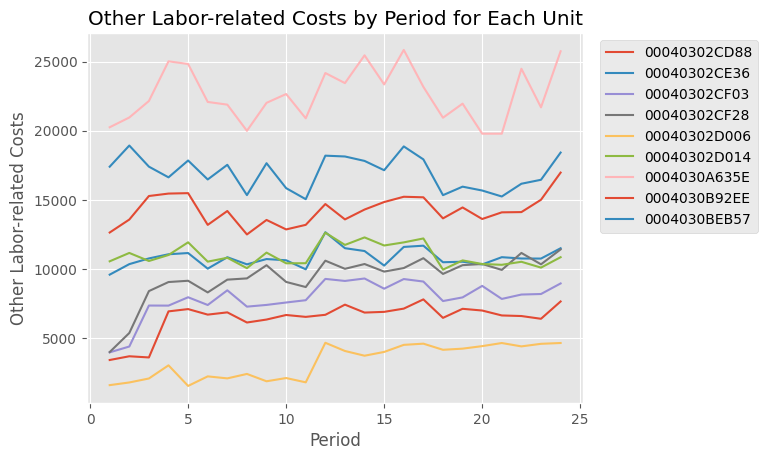

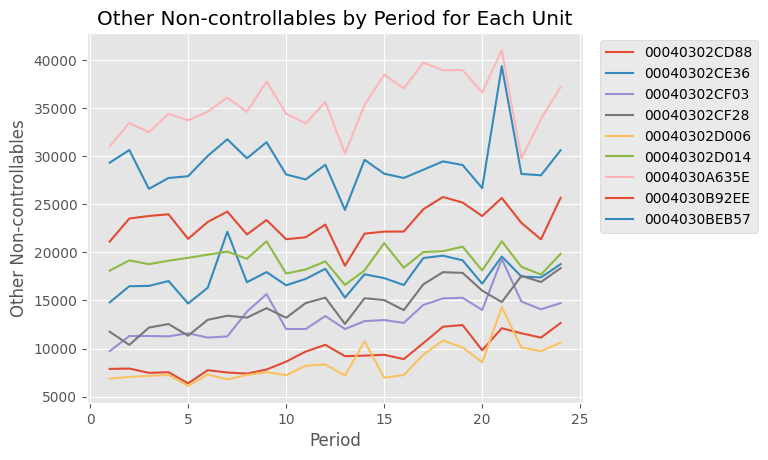

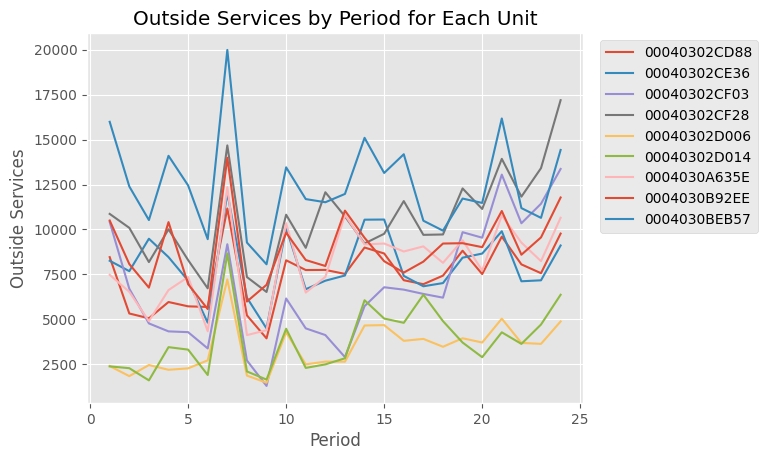

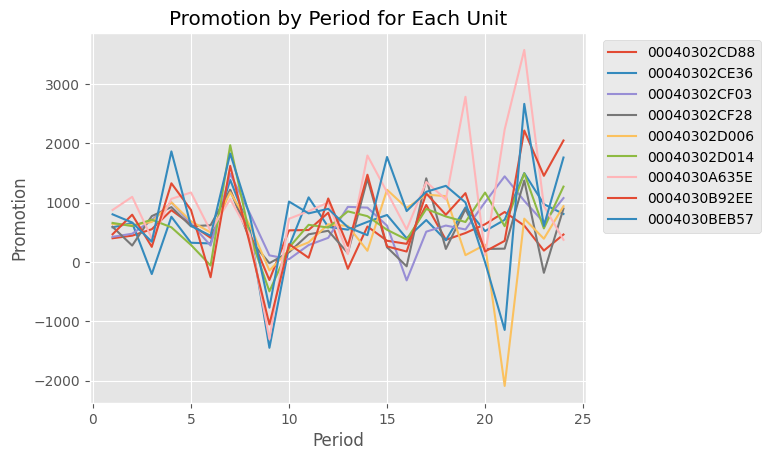

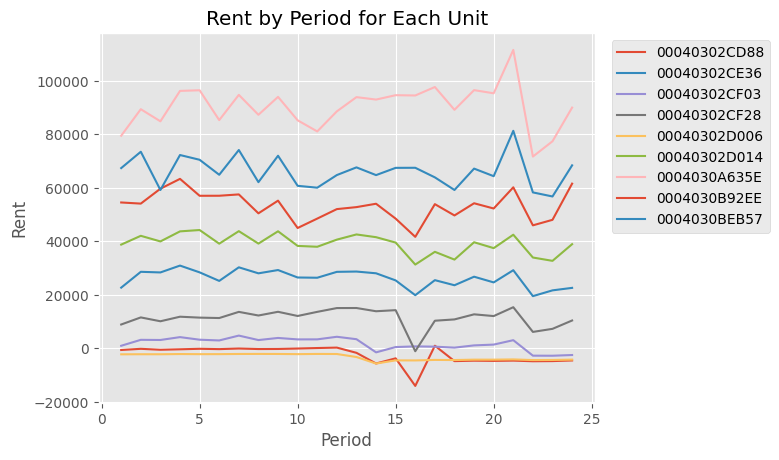

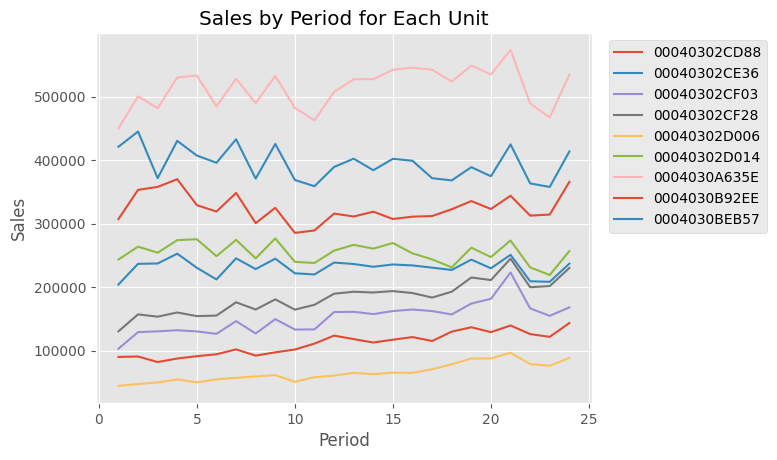

In [63]:
# Make a line chart of the amount in each account over the dataset
account_columns = unmelt.columns[3:16]
periods = unmelt['Period'].unique()

# Iterate over the account columns
for account in account_columns:
    # Pivot the data for the current account
    account_data = unmelt.pivot(index='Unit', columns='Period', values=account)
    
    # Create the line chart
    ax = account_data.T.plot()
    
    # Set the title and labels
    plt.title(f'{account} by Period for Each Unit')
    plt.xlabel('Period')
    plt.ylabel(account)
    
    # Adjust the legend position
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    
    # Display the chart
    plt.show()

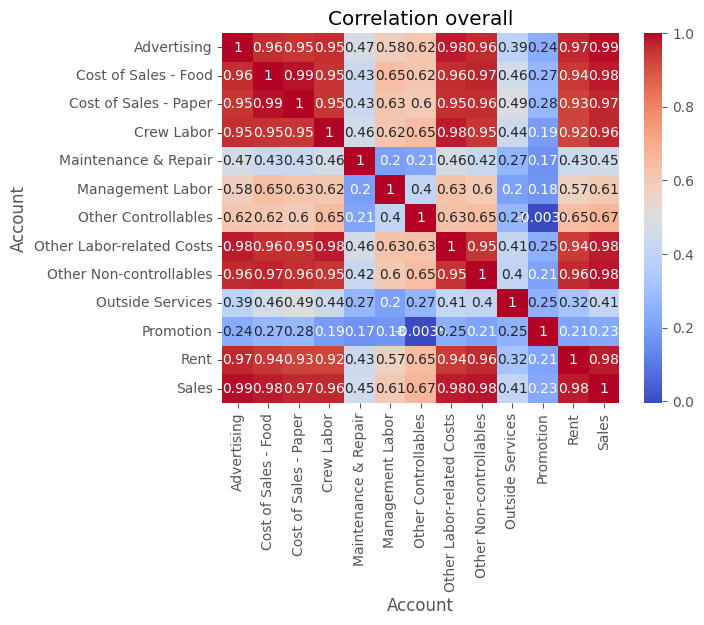

In [64]:
# Do corr matrix of columns across firms
# Select only account column
account_columns = unmelt.columns[3:16]
# Make correlation matrix
corrm1 = unmelt[account_columns].corr()
# Create heatmap
sns.heatmap(corrm1, annot=True, cmap='coolwarm')
# Title
plt.title('Correlation overall')
plt.show()

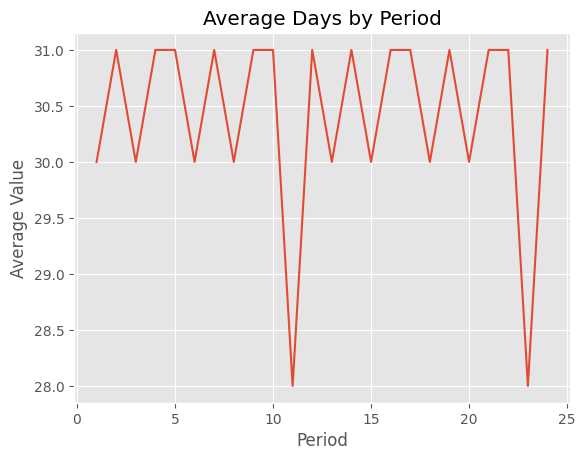

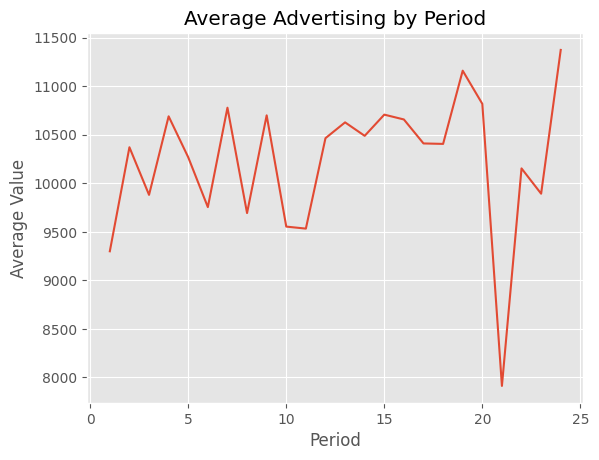

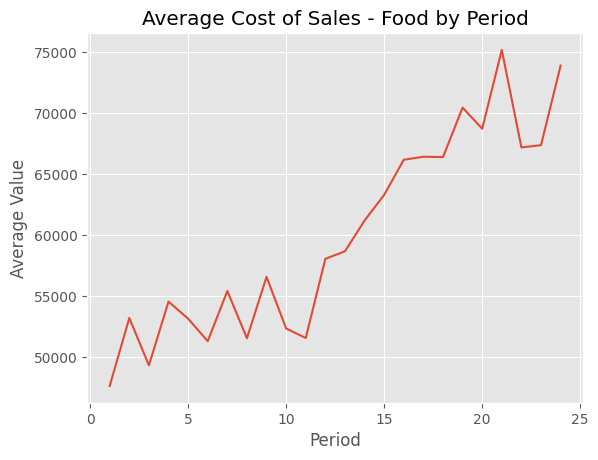

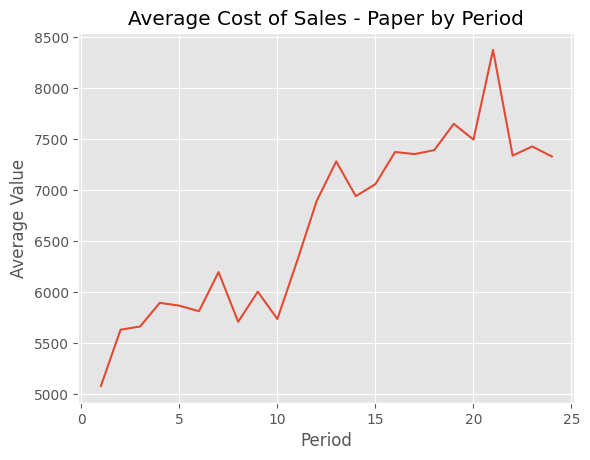

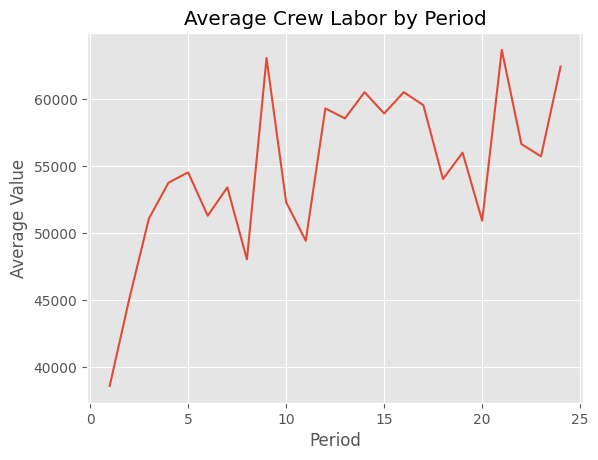

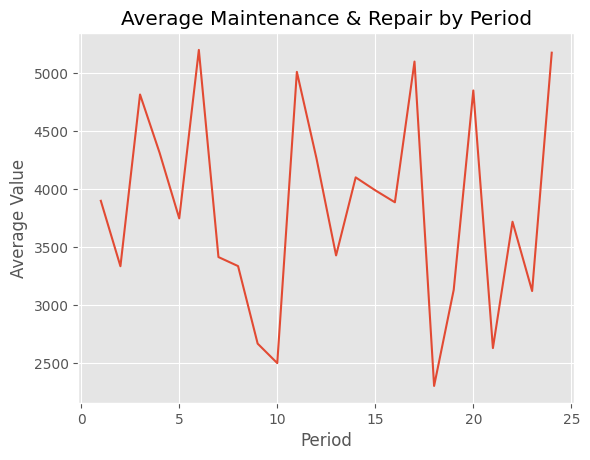

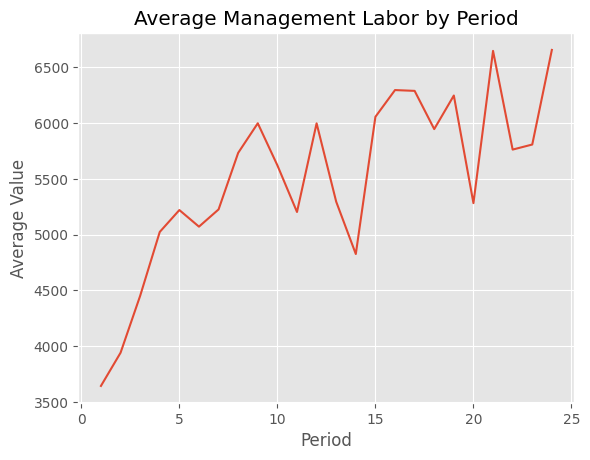

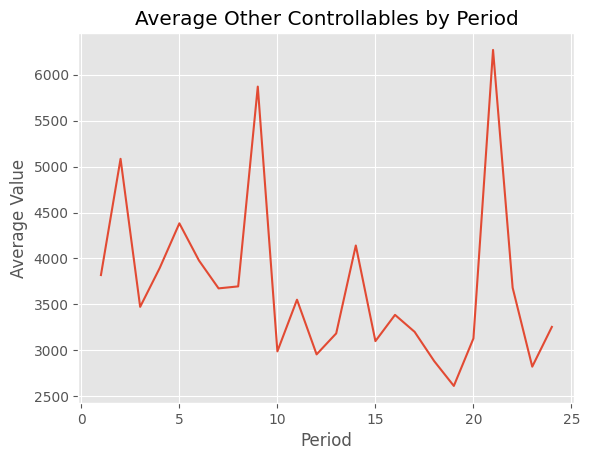

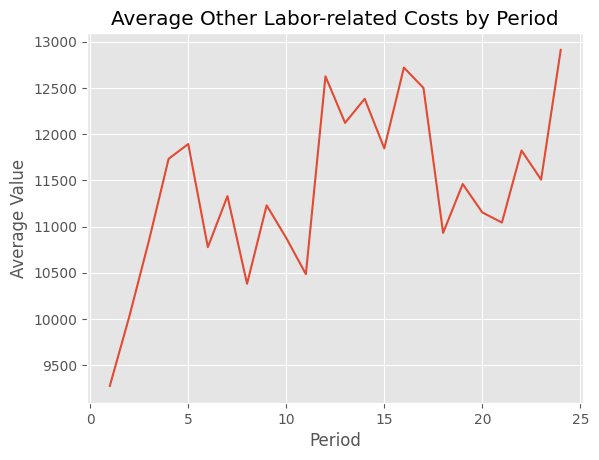

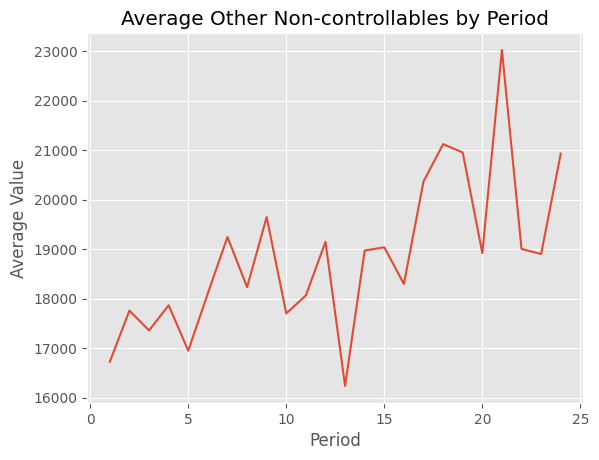

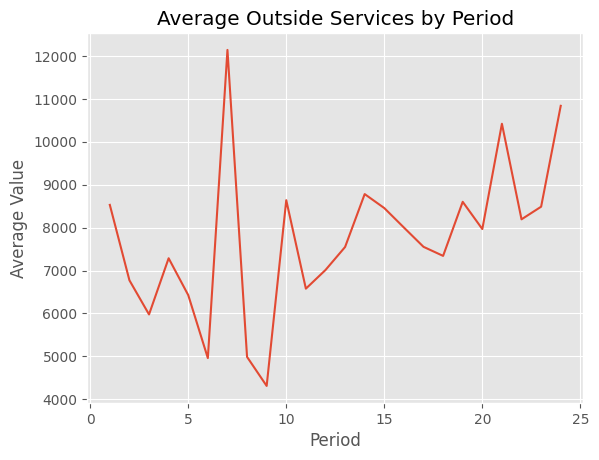

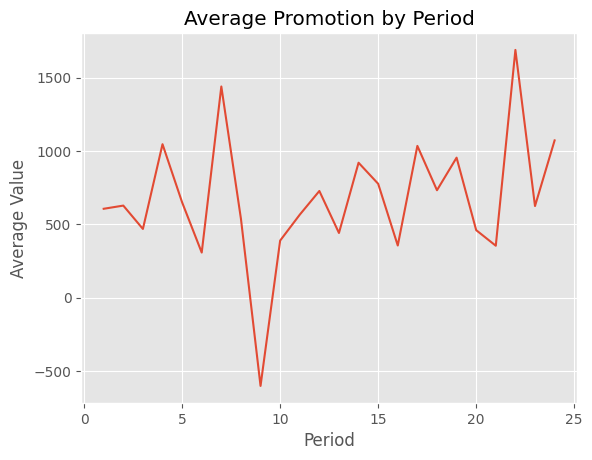

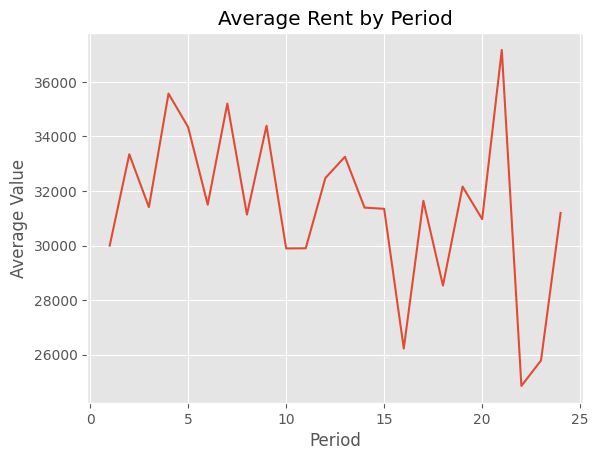

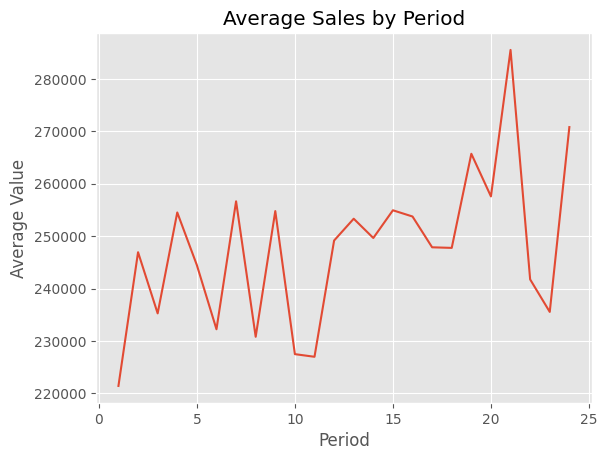

In [65]:
# Make a line chart of the average amount in each account over the dataset
account_columns = unmelt.columns[2:16]
periods = unmelt['Period'].unique()

# Iterate over the account columns
for account in account_columns:
    # Calculate the average value for each period and account
    account_avg = unmelt.groupby('Period')[account].mean()

    # Create the line chart
    plt.plot(account_avg.index, account_avg.values)

    # Set the title and labels
    plt.title(f'Average {account} by Period')
    plt.xlabel('Period')
    plt.ylabel('Average Value')

    # Display the chart
    plt.show()

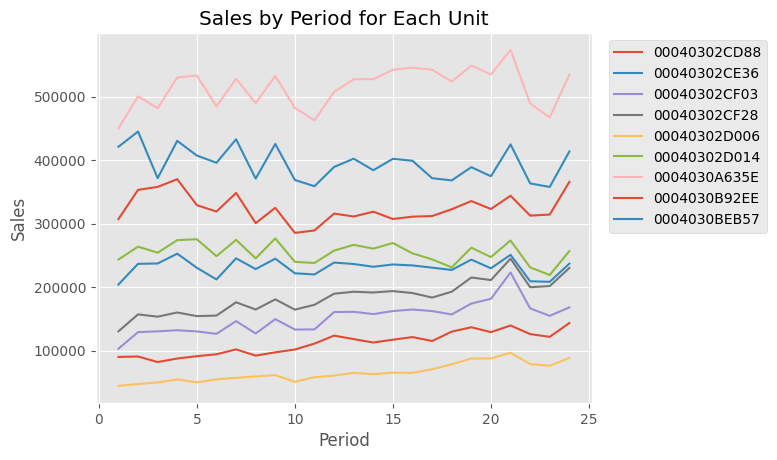

In [66]:
# Make a line chart of the amount in sales over the dataset
sales_data = unmelt.pivot(index='Unit', columns='Period', values='Sales')

# Create the line chart
ax = sales_data.T.plot()

# Set the title and labels
plt.title('Sales by Period for Each Unit')
plt.xlabel('Period')
plt.ylabel('Sales')

# Adjust the legend position
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Display the chart
plt.show()


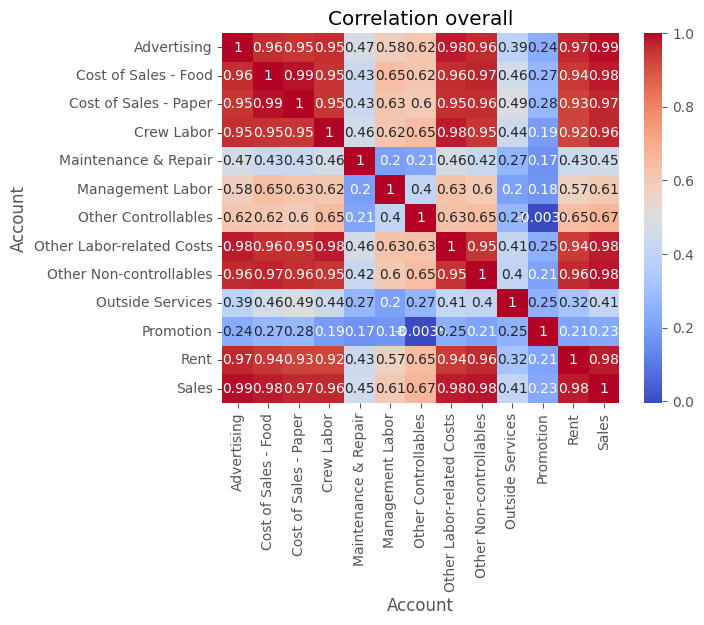

In [67]:
# Do corr matrix of columns across firms
# Select only account column
account_columns = unmelt.columns[3:16]
# Make correlation matrix
corrm1 = unmelt[account_columns].corr()
# Create heatmap
sns.heatmap(corrm1, annot=True, cmap='coolwarm')
# Title
plt.title('Correlation overall')
plt.show()

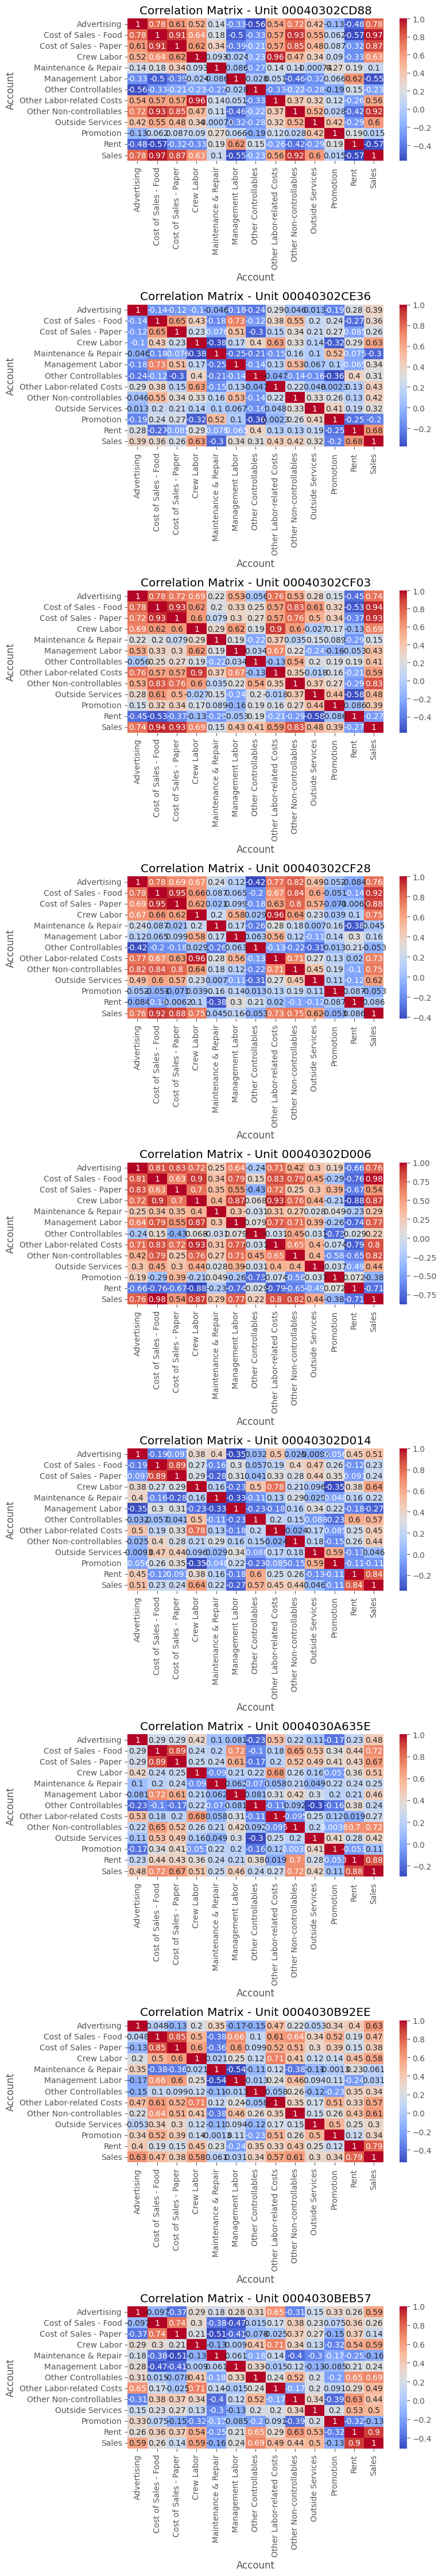

In [68]:
account_columns = unmelt.columns[3:16]
units = unmelt['Unit'].unique()
num_units = len(units)

# Calculate the number of rows and columns for subplots
num_rows = num_units
num_cols = 1

# Create subplots for each unit
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 5 * num_units))

# Iterate over the units and create a heatmap for each unit
for i, unit in enumerate(units):
    unit_df = unmelt[unmelt['Unit'] == unit]
    correlation_matrix = unit_df[account_columns].corr()

    ax = axes[i]
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(f'Correlation Matrix - Unit {unit}')

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

# Feature Engineering

In [69]:
columns_to_average = unmelt.columns.drop(['Unit', 'Period', 'Days', 'Sales'])
for col in columns_to_average:
    unmelt[f'Average daily {col}'] = (unmelt[col] / unmelt['Days']).round(2)
unmelt.to_excel('data/output.xlsx', sheet_name='unmelt')

In [70]:
# Add columns to the dataframe as per the Example P & L excel file
unmelt['Total Cost of Sales'] = unmelt.iloc[:, 3:5].sum(axis=1)
unmelt['Gross Profit'] = unmelt['Sales'] - unmelt['Total Cost of Sales']
unmelt['Total Labor'] = unmelt.iloc[:, [5, 7, 9]].sum(axis=1)
unmelt['Total Prime Costs'] = unmelt['Total Cost of Sales'] + unmelt['Total Labor']
unmelt['Total Controllable Costs'] = unmelt.iloc[:, [2, 5, 7, 9, 10, 11, 12, 14]].sum(axis = 1)
unmelt['Controllable Profit'] = unmelt['Gross Profit'] - unmelt['Total Controllable Costs']
unmelt['Total Non-controllable Costs'] = unmelt['Cost of Sales - Food'] + unmelt['Cost of Sales - Paper']
unmelt['Store EBITDA'] = unmelt['Gross Profit'] - unmelt['Total Controllable Costs'] - unmelt['Total Non-controllable Costs']

In [71]:
# Group data by unit
grouped_data = unmelt.drop(columns=['Period', 'Days']).groupby('Unit').sum()
grouped_data

Account       Advertising  Cost of Sales - Food  Cost of Sales - Paper  \
Unit                                                                     
00040302CD88       109741                720626                  82141   
00040302CE36       229150               1347519                 148997   
00040302CF03       149145                882289                 103966   
00040302CF28       181308               1120990                 136565   
00040302D006        63925                388096                  46804   
00040302D014       252284               1422862                 148973   
0004030A635E       510987               2904984                 313677   
0004030B92EE       321873               1901998                 204654   
0004030BEB57       391903               2266305                 252347   

Account       Crew Labor  Maintenance & Repair  Management Labor  \
Unit                                                               
00040302CD88      701391                 78634            105206   
00040302CE36     1284266                 77781            126972   
00040302CF03      906952                 78844            110631   
00040302CF28     1055731                 91160            139168   
00040302D006      280791                 56467             78184   
00040302D014     1314039                 82393            149005   
0004030A635E     2494044                117275            197547   
0004030B92EE     1737196                124223            147557   
0004030BEB57     2086903                120814            135831   

Account       Other Controllables  Other Labor-related Costs  \
Unit                                                           
00040302CD88                71672                     154874   
00040302CE36                83111                     259812   
00040302CF03                81785                     189284   
00040302CF28                83189                     225791   
00040302D006                49276                      79529   
00040302D014                77871                     263992   
0004030A635E               137337                     542492   
0004030B92EE               106694                     341753   
0004030BEB57               110448                     407477   

Account       Other Non-controllables  Outside Services  ...  \
Unit                                                     ...   
00040302CD88                   225612            178464  ...   
00040302CE36                   419873            192744  ...   
00040302CF03                   316942            164199  ...   
00040302CF28                   348075            255092  ...   
00040302D006                   202873             82064  ...   
00040302D014                   459970             92344  ...   
0004030A635E                   848481            193584  ...   
0004030B92EE                   551801            214347  ...   
0004030BEB57                   699612            299330  ...   

Account       Average daily Rent  Average daily Utilities  \
Unit                                                        
00040302CD88            -1946.42                  4320.97   
00040302CE36            20680.12                  4650.89   
00040302CF03             1375.30                  4586.04   
00040302CF28             8980.12                  4684.85   
00040302D006            -2563.60                  2167.13   
00040302D014            30939.68                  5213.66   
0004030A635E            71272.49                  6484.50   
0004030B92EE            42008.25                  5467.47   
0004030BEB57            52207.40                  6037.78   

Account       Total Cost of Sales  Gross Profit  Total Labor  \
Unit                                                           
00040302CD88               830367       1841416       232447   
00040302CE36              1576669       3967273       309889   
00040302CF03              1031434       2600347       264595   
00040302CF28              1302298 

In [72]:
columns_to_convert = grouped_data.columns.drop('Sales')
for col in columns_to_convert:
    grouped_data[f'{col}(%)'] = (grouped_data[col] * 100 / grouped_data['Sales']).round(2)
df_existing = pd.read_excel('data/output.xlsx')
with pd.ExcelWriter('data/output.xlsx', mode='a') as writer:
    grouped_data.to_excel(writer, sheet_name='grouped_data')

# Modelling

In [73]:
from sklearn import linear_model

In [74]:
reg = linear_model.LinearRegression()
averaged_columns = [col for col in grouped_data.columns if 'Average' in col and '%' in col]
grouped_data_model = grouped_data[['Sales'] + averaged_columns].copy()
for col in averaged_columns:
    reg.fit(grouped_data_model[['Sales']], grouped_data_model[col])
    grouped_data_model[f'Slope for {col}'] = reg.coef_[0]
df_existing = pd.read_excel('data/output.xlsx')
with pd.ExcelWriter('data/output.xlsx', mode='a') as writer:
    grouped_data_model.to_excel('data/output.xlsx', sheet_name='grouped_data_model')